# **Predicting Diabetes Risk: Analysis of Health Indicators**

Leo Jiang, Sean Stone, Tinu Vanapamula, Bryan Xiong

# **Introduction**

Diabetes is a condition that happens when one's blood sugar level is too high, and over time, can cause health problems like heart disease, nerve damage, and eye issues. It's become one of the most pressing public health challenges in the United States, affecting over 38 million Americans' in both health problems and healthcare costs. According to the CDC, approximately 98 million American adults, or more than a third, have prediabetes, yet greater than 80% are unaware that they have it at all.
https://my.clevelandclinic.org/health/diseases/7104-diabetes
https://www.cdc.gov/diabetes/communication-resources/prediabetes-statistics.html

Early identification of individuals at risk for diabetes is crucial for prevention and intervention. While clinical diagnosis requires laboratory tests, we can first analyze health and lifestyle indicators to understand and identify which populations are most likely to be at risk of diabetes and thus anticipate who is best suited for targeted screening and preventative care. This is where machine learning and data science can make a meaningful impact.

The goal of this tutorial is to identify which health and lifestyle indicators are most closely associated with diabetes risk as well as be able to predict an individual's diabetes status using machine learning classification models.

These findings are important for several reasons:
1. Predictive models can help identify populations that would benefit most from screening programs
2. Early identification of high-risk individuals enabels early prevention of disease
3. Awareness of modifiable risk factors (BMI, physical activity, smoking) allows people to make informed lifestyle choices

# Data Curation

We are using the Diabetes Health Indicators Dataset from Kaggle, which includes data from a 2015 survey conducted by the CDC, particularly the first dataset, **diabetes_012_health_indicators_BRFSS2015**.
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset  

The dataset contains 253,000+ responses and 22 features including health indicators, demographics, and lifestyle choices, including diabetes status, blood pressure, cholesterol, BMI, mental and physical health, smoking, physical activity, diet, alcoholism, age, income, and more.

To engage with the data, we will organize it in a pandas DataFrame.

In [44]:
import kagglehub
import pandas as pd
import numpy as np
import os

dataset = "alexteboul/diabetes-health-indicators-dataset"

path = kagglehub.dataset_download(dataset)

file_path = os.path.join(path, "diabetes_012_health_indicators_BRFSS2015.csv")
df = pd.read_csv(file_path)

print("Dataset path:", file_path)
print("First 5 rows:")
print(df.head())

Dataset path: /Users/tinu/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1/diabetes_012_health_indicators_BRFSS2015.csv
First 5 rows:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0 

As we can see from the head of the table above, each feature is described using numbers in certain ranges for normalized comparison i.e. age is separated into 13 categories (18-24, 25-29, etc.), and mental and physical health is measured by # of days in the past 30 that were considered not good.

# Basic Data Exploration

253680
253680
"The P-Value is 2.580241456213391e-208


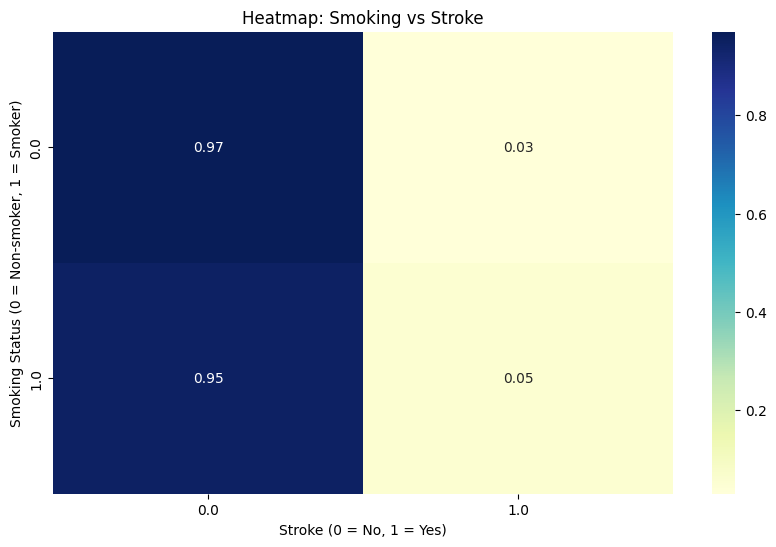

In [45]:
# Length of both columns, since they are the same that means we likely
# don't have missing data
print(len(df['Smoker']))
print(len(df['Stroke']))

# Does being a smoker make you more likely to have a stroke?
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# We will do a hypothesis test of chi square with an alpha value of .05
# Ho: Being a smoker does not change the likelihood of a stroke
# Ha: Being a smoker does change the likelihood of a stroke
table = pd.crosstab(df['Smoker'], df['Stroke'])
chi, p_val, dof, expected = chi2_contingency(table)
print(f'"The P-Value is {p_val}')
# Conclusion: Since the p value of 2.58*10^-208 < .05, we reject the null
# hypothesis. This means that we can say that being a smoker does correlate
# to having a stroke since there appears to be a dependence


# We change the table to be in terms of proportions so we can visualize it in a heatmap
table = pd.crosstab(df['Smoker'], df['Stroke'],normalize = 'index')

# The graph
plt.figure(figsize=(10,6))
sns.heatmap(table, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)

plt.title("Heatmap: Smoking vs Stroke")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Smoking Status (0 = Non-smoker, 1 = Smoker)")

# displaying heatmap
# This shows the proportion of each thing. We can see that there is a higher probability
# That if they are a smoker, they had a stroke, .97 vs .03 than if they are not a smoker
# which is instead .95 vs .05. This shows a higher amount of smokers having a stroke

plt.show()

253680
253680


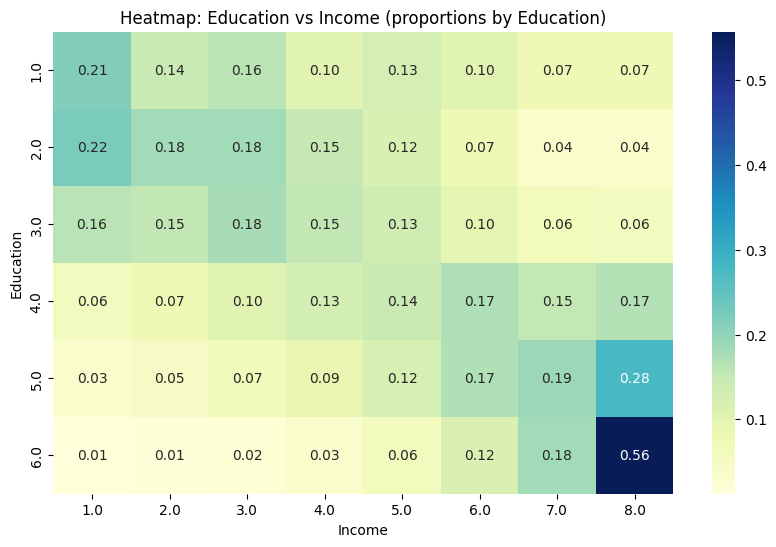

                            OLS Regression Results                            
Dep. Variable:                 Income   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                 6.409e+04
Date:                Tue, 09 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:32:50   Log-Likelihood:            -5.1609e+05
No. Observations:              253680   AIC:                         1.032e+06
Df Residuals:                  253678   BIC:                         1.032e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2883      0.019     67.175      0.0

In [46]:
# Look at the length of both columns Education and Income to see if there is missing data
print(len(df['Education']))
print(len(df['Income']))

import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross tabulation table of Education vs Income
table = pd.crosstab(df['Education'], df['Income'], normalize='index')  # proportions per Education
plt.figure(figsize=(10,6))
sns.heatmap(table, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Heatmap: Education vs Income (proportions by Education)")
plt.xlabel("Income")
plt.ylabel("Education")
plt.show()

# We will do a linear regression analysis to see if there is a correlation between Education and Income
import statsmodels.api as sm
X = df['Education']
Y = df['Income']
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

# Do hypothesis testing to see if the correlation is significant
# Ho: There is no correlation between Education and Income
# Ha: There is a correlation between Education and Income
alpha = 0.05
p_value = model.f_pvalue
print(f"P-Value for the correlation between Education and Income: {p_value}")
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between Education and Income.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between Education and Income.")

# Conclusion: Since the p-value is < .05, we reject the null hypothesis. This means that there is a significant correlation between Education and Income.


Average BMI for each Diabetes Category:
   Diabetes_012        BMI
0           0.0  27.742521
1           1.0  30.724466
2           2.0  31.944011
Average BMI for No Diabetes: 27.74
Average BMI for Prediabetes: 30.72
Average BMI for Diabetes: 31.94


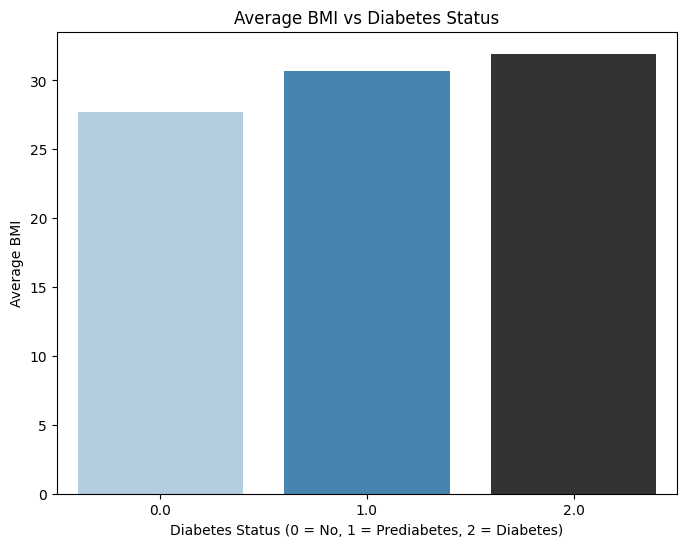

ANOVA test results: F-statistic = 6768.36, p-value = 0.0000


In [47]:
# Group by diabetes status and compute average BMI
bmi_by_diabetes = df.groupby('Diabetes_012')['BMI'].mean().reset_index()

print("Average BMI for each Diabetes Category:")
print(bmi_by_diabetes)

mean_bmi_no = bmi_by_diabetes.loc[bmi_by_diabetes['Diabetes_012'] == 0, 'BMI'].values[0]
mean_bmi_prediabetes = bmi_by_diabetes.loc[bmi_by_diabetes['Diabetes_012'] == 1, 'BMI'].values[0]
mean_bmi_diabetes = bmi_by_diabetes.loc[bmi_by_diabetes['Diabetes_012'] == 2, 'BMI'].values[0]

print(f"Average BMI for No Diabetes: {mean_bmi_no:.2f}")
print(f"Average BMI for Prediabetes: {mean_bmi_prediabetes:.2f}")
print(f"Average BMI for Diabetes: {mean_bmi_diabetes:.2f}")

plt.figure(figsize=(8,6))
sns.barplot(
    x='Diabetes_012',
    y='BMI',
    hue='Diabetes_012',
    data=bmi_by_diabetes,
    palette='Blues_d',
    legend=False
)

plt.title("Average BMI vs Diabetes Status")
plt.xlabel("Diabetes Status (0 = No, 1 = Prediabetes, 2 = Diabetes)")
plt.ylabel("Average BMI")
plt.show()

# run a an ANOVA test to see if the differences in BMI across diabetes categories are statistically significant
from scipy.stats import f_oneway
bmi_no = df[df['Diabetes_012'] == 0]['BMI']
bmi_prediabetes = df[df['Diabetes_012'] == 1]['BMI']
bmi_diabetes = df[df['Diabetes_012'] == 2]['BMI']
f_stat, p_val = f_oneway(bmi_no, bmi_prediabetes, bmi_diabetes)
print(f"ANOVA test results: F-statistic = {f_stat:.2f}, p-value = {p_val:.4f}")

# Conclusion comment:
# The average BMI increases with diabetes severity (0 < 1 < 2). This suggests a
# positive relationship between higher BMI and likelihood of diabetes. People
# with diabetes tend to have higher average BMI values than those without.

# ANOVA conclusion:
# Since the p-value from the ANOVA test is < .05, we reject the null hypothesis.
# This indicates that there are statistically significant differences in BMI
# across the three diabetes categories.

## Final ML Primary Analysis

Before we can train a classifier model on our data we create a train and test set from our dataframe. We've chosen to use 80% of the data for training and the rest for testing.

In [48]:
# this part is just a classifier for diabetes, splitting data into train/test 0.8/0.2
# dataset is https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset
# stored in df var from previous parts

from sklearn.model_selection import train_test_split

def split_dataset(df, train_size=0.8):
    train_df, test_df = train_test_split(df, train_size=train_size, shuffle=True, random_state=42)
    return train_df, test_df

# splitting our data into test and train
train_df, test_df = split_dataset(df, train_size=0.8)
print("Training dataset shape:", train_df.shape)
print("Testing dataset shape:", test_df.shape)


# diabetes_012 has 3 values: 0 for none, 1 for prediabetes, 2 for diabetes
print("# Diabetic samples in training set:", len(train_df[train_df['Diabetes_012'] == 2]))
print("# Prediabetic samples in training set:", len(train_df[train_df['Diabetes_012'] == 1]))
print("# Non diabetic samples in training set:", len(train_df[train_df['Diabetes_012'] == 0]))
print()
print("# Diabetic samples in testing set:", len(test_df[test_df['Diabetes_012'] == 2]))
print("# Prediabetic samples in testing set:", len(test_df[test_df['Diabetes_012'] == 1]))
print("# Non diabetic samples in testing set:", len(test_df[test_df['Diabetes_012'] == 0]))


Training dataset shape: (202944, 22)
Testing dataset shape: (50736, 22)
# Diabetic samples in training set: 28349
# Prediabetic samples in training set: 3687
# Non diabetic samples in training set: 170908

# Diabetic samples in testing set: 6997
# Prediabetic samples in testing set: 944
# Non diabetic samples in testing set: 42795


Now that we have train and test sets, we try 4 classifiers here: KNN, Decision Tree, Random Forest, and XGBoost.

In [49]:
seed = 42

X_train = train_df.drop(columns=['Diabetes_012'])
y_train = train_df['Diabetes_012']

X_test = test_df.drop(columns=['Diabetes_012'])
y_test = test_df['Diabetes_012']

In [50]:
# comparison classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Convert to numpy arrays and ensure C-contiguous for compatibility with KNN
X_train_array = np.ascontiguousarray(X_train.values)
y_train_array = np.ascontiguousarray(y_train.values)

models = {
          'KNN': KNeighborsClassifier(n_neighbors=5),
          'DecisionTree': DecisionTreeClassifier(random_state=seed),
          'RandomForest':RandomForestClassifier(n_estimators=300,max_depth=30,random_state=seed,class_weight="balanced",n_jobs=-1),
          'XGBoost': XGBClassifier(
                      n_estimators=300,
                      random_state=seed,
                      n_jobs=-1
                  )
          # logistic regression takes far too long with this many features, and with most of our data being 0s and 1s
          }
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

for model_name, model in models.items():
    np.random.seed(42)
    print(f"Model: {model_name}")

    cv_scores = cross_val_score(model, X_train_array, y_train_array, cv=skf, scoring='accuracy')
    print(f"Cross-validated Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


Model: KNN


Cross-validated Accuracy: 0.8307 (+/- 0.0006)
Model: DecisionTree
Cross-validated Accuracy: 0.7670 (+/- 0.0011)
Model: RandomForest
Cross-validated Accuracy: 0.8389 (+/- 0.0007)
Model: XGBoost
Cross-validated Accuracy: 0.8460 (+/- 0.0006)


XGBoost seems to be the most accurate model out of the four so we can use that as our predictor.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

xg = XGBClassifier(
    n_estimators=300,
    random_state=seed,
    n_jobs=-1,
    num_class=3,
)

# fit and predict
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

# Evaluate the model on the training and validation data
train_accuracy = xg.score(X_train, y_train)
val_accuracy = xg.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8488252917060864
Training Accuracy: 0.8747831914222642
Validation Accuracy: 0.8488252917060864

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.53      0.20      0.30      6997

    accuracy                           0.85     50736
   macro avg       0.47      0.39      0.40     50736
weighted avg       0.80      0.85      0.81     50736



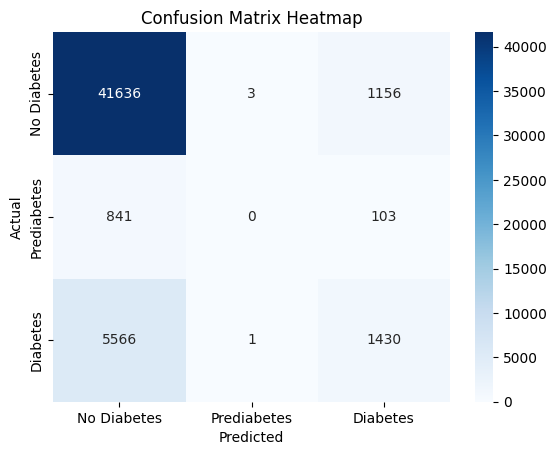

In [52]:

# making the matrix itself
cm = confusion_matrix(y_test, y_pred)

# titles
title = ["No Diabetes", "Prediabetes", "Diabetes"]

# creates a new heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap = 'Blues',xticklabels=title, yticklabels=title)


# It shows this model is very good at predicting if someone does not have diabetes
# It is reletively good at predicting prediabetes, but it could be better
# It is terrible at predicting disbetes as it misses around half of the entries
# it also shows the model is unbalanced as over 40000 entries are in No diabetes
# where Prediabetics has under 1000 and Diabetes has about 7000. The amount of entries
# may be part of the reason for this difference
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix Heatmap")
plt.show()

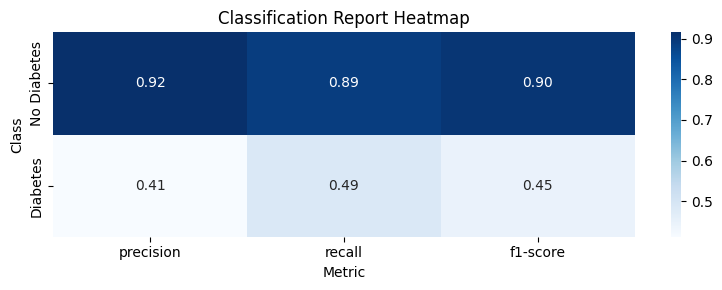

In [55]:
# This data shows that no diabetes has a string precision, recall, and f1 score
# the diabetes class instead has a moderate one, so a lot of the data is
# still going to be incorrectly categorized
# uses the new data created
report_dict = classification_report(y_test_binary, y_pred, output_dict=True, zero_division=0)

report_df = pd.DataFrame(report_dict).transpose()

# we are trying to represent these three categories
metrics = ["precision", "recall", "f1-score"]

# getting the two rows
class_df = report_df.iloc[:2][metrics]

# Replace the index with proper class names
class_df.index = ["No Diabetes", "Diabetes"]

plt.figure(figsize=(8, 3))
sns.heatmap(class_df, annot=True, fmt=".2f", cmap="Blues", 
            yticklabels=class_df.index, xticklabels=metrics)
plt.title("Classification Report Heatmap")
plt.ylabel("Class")
plt.xlabel("Metric")
plt.tight_layout()
plt.show()

We see a really bad F1 score for the prediatics and diabetics, and we're mainly focusing on identifying diabetics, so we can combine the prediabetics with the non diabetics.

In [54]:
import math

y_train_binary = y_train.replace({0: 0, 1: 0, 2: 1})
y_test_binary = y_test.replace({0: 0, 1: 0, 2: 1})

scale = y_train_binary.value_counts()[0] / y_train_binary.value_counts()[1]
# print(y_train_binary.value_counts())
# print(y_train.value_counts())

xg = XGBClassifier(
    n_estimators=300,
    random_state=seed,
    n_jobs=-1,
    scale_pos_weight= math.sqrt(scale)
)

xg.fit(X_train, y_train_binary)

y_pred = xg.predict(X_test)


# Evaluation
print("Accuracy:", accuracy_score(y_test_binary, y_pred))
train_accuracy = xg.score(X_train, y_train_binary)
val_accuracy = xg.score(X_test, y_test_binary)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred))

Accuracy: 0.8336684011352885
Training Accuracy: 0.8676531456953642
Validation Accuracy: 0.8336684011352885

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90     43739
         1.0       0.41      0.49      0.45      6997

    accuracy                           0.83     50736
   macro avg       0.66      0.69      0.67     50736
weighted avg       0.85      0.83      0.84     50736



# Insights and Conclusions

With our exploratory analysis, we found that there was an extremely strong relationship between BMI and diabetic status via ANOVA testing, and that educational standing is closely correlated with income. In our primary analysis, we found that XGBoost was the best model for our problem compared to the other classifiers we investigated, like random forest, KNN and decision tree, with 84.6% accuracy compared to 83.9%, 83% and 76.7% respectively. XGBoost's gradient boosting approach sequentially corrects errors from previous iterations, allowing it to learn complex patterns in the data, and is also able to adapt better to class imbalnace via weighted loss function.

In modeling our data using XGBoost, we found extreme sucess in predicting no diabetes in both recall and precision, at 87% and 97% respectively. However, we fall short predicting both non-diabetic patients, which both prediabetic and diabetic patients are included in. This dissonance can be partially attributed to the large gap in numbers between classes, as there is a much larger sample of people with no diabetes vs. people with diabetes and prediabetes in general. Ultimately, the dataset is largely imbalanced, which is reflected in how our model performs in different situations.

Revisiting our introductory questions, we find:

1. **What are the strongest health and lifestyle indicators associated with diabetes risk?**

BMI is overwhelmingly the strongest indicator that we looked at, showing a clear relationship with diabetes progression. Other important factors likely include general health status, age, high blood pressure, and high cholesterol (as indicated by feature importance rankings).

2. **Can we accurately predict an individual's diabetes status using machine learning?**

To an extent, our random forest model is able to identify healthy individuals with 97% recall and confirm it with 88% precision, but falls short of being able to detect prediabetes and lacks severely in detecting diabetes cases in general.